# Zuber: Exploring the World of Taxi Cabs in Chicago

## Introduction:
Welcome to Zuber's data analytics project, a new ride-sharing company launching in Chicago. In this project, we will investigate available data to understand passenger preferences and analyze the impact of external factors on taxi rides. Our goal is to uncover patterns and insights that can guide decision-making and service improvement at Zuber.

### Project description:
Zuber hired us as a data analyst to mine a database with detailed information about cab rides in Chicago. Our job is to identify patterns and trends in rides, understand rider preferences and investigate the impact of external factors, such as weather, on trip frequency. Based on this information, Zuber expects to make strategic decisions to provide an efficient and high quality ridesharing service.

### Data Description:
The database provided contains several tables that contain valuable information about cab rides in Chicago:

The "neighborhoods" table presents data about the city's neighborhoods, including the neighborhood name and a unique identification code for each neighborhood.

The "cabs" table provides information about cabs, including vehicle codes and the company that owns each cab.

The "trips" table contains specific data about taxi trips, such as the trip code, the vehicle that made the trip, the start and end date and time of the trip (rounded to the hour), the duration of the trip in seconds , the distance traveled in miles, and the pick-up and drop-off neighborhood codes.

In addition, we have the "weather_records" table that contains information about weather conditions, including the date and time of the record, the temperature recorded, and a brief description of the conditions, such as "light rain" or "sparse clouds".

### Languages and Methods:
To explore and analyze this data, we will use a combination of SQL (Structured Query Language) and Python. SQL will be used to query and extract data from the relational database, while Python will be the main language for analyzing data and creating visualizations. We will make use of popular libraries like pandas and matplotlib for data manipulation and visualization, making the analysis understandable and accessible.

Let's embark on this exciting journey of data analysis and find out what the numbers have to tell us about the world of taxis in Chicago!

## Importing libraries

Let's import the necessary libraries for our analyses:

In [22]:
import pandas as pd

import requests

from bs4 import BeautifulSoup

import matplotlib.pyplot as plt

import scipy.stats as stats

## Database connection

Let's import the tables needed for our data exploration, starting with the weather records:

In [23]:
# Importing the 'weather_records' table from your website

URL = 'https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'

req = requests.get(URL)
soup = BeautifulSoup(req.text, 'html.parser')

table = soup.find('table', attrs={'id': 'weather_records'})
data = []

for row in table.find_all('tr'):
    cols = row.find_all('td')
    if len(cols) == 3:
        date = cols[0].text.strip()
        temperature = cols[1].text.strip()
        description = cols[2].text.strip()
        data.append([date, temperature, description])

weather_records = pd.DataFrame(data, columns=['Date and time', 'Temperature', 'Description'])

weather_records.head()


,Date and time,Temperature,Description
0,2017-11-01 00:00:00,276.150,broken clouds
1,2017-11-01 01:00:00,275.700,scattered clouds
2,2017-11-01 02:00:00,275.610,overcast clouds
3,2017-11-01 03:00:00,275.350,broken clouds
4,2017-11-01 04:00:00,275.240,broken clouds


Let's import and visualize the first rows of the table that shows the number of trips for each company, sorted in descending order:

In [24]:
# Importing the file 'project_sql_result_01.csv'
trips_amount = pd.read_csv('/datasets/project_sql_result_01.csv')

trips_amount.head()


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


We will now import the table with data for the Chicago neighborhoods where the rides ended and the average number of trips that ended in each neighborhood in November 2017:

In [25]:
# Importing the file 'project_sql_result_04.csv'
average_trips = pd.read_csv('/datasets/project_sql_result_04.csv')

average_trips.head()


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Then we will import the `duration_seconds` Dataframe that indicates the chronological and meteorological times, as well as the duration of the races:

In [26]:
# Importing the file 'project_sql_result_07.csv'
duration_seconds = pd.read_csv('/datasets/project_sql_result_07.csv')

duration_seconds.head()


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


## Exploratory Data Analysis (Python)

### Checking data types

In [27]:
print('Columns and data types of the `weather_records` Dataframe')
print(weather_records.dtypes)
print()

print('Columns and data types of the `trips_amount` Dataframe')
print(trips_amount.dtypes)
print()

print('Columns and data types of the `average_trips` Dataframe')
print(average_trips.dtypes)
print()

print('Columns and data types of the `duration_seconds` Dataframe')
print(duration_seconds.dtypes)

Columns and data types of the `weather_records` Dataframe
Date and time    object
Temperature      object
Description      object
dtype: object

Columns and data types of the `trips_amount` Dataframe
company_name    object
trips_amount     int64
dtype: object

Columns and data types of the `average_trips` Dataframe
dropoff_location_name     object
average_trips            float64
dtype: object

Columns and data types of the `duration_seconds` Dataframe
start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object


By analyzing the column names and data types of the DataFrames, we can make the following observations:

**weather_records**:

Column "Date and time" is stored as type "object", which is usually used for text data. It would be more appropriate to convert this column to type "datetime" to facilitate manipulation and parsing of dates and times.

The "Temperature" column is also stored as an "object" type, which can make numerical calculations difficult. It would be advisable to convert this column to type "float" or "int" if numerical operations with temperature are to be performed.

Both columns have their titles in capital letters and one of them even has spaces.



**trips_amount**:

Columns "company_name" and "trips_amount" are correctly stored as type "object" and "int64", respectively. There don't seem to be any issues with the data types in this DataFrame.



**average_trips:**

Column "dropoff_location_name" is stored as type "object", which is suitable for text data.

Column "average_trips" is stored as type "float64", which is appropriate for representing decimal values.



**duration_seconds:**

Column "start_ts" is stored as type "object". If it contains date and time information, it would be a good idea to convert it to type "datetime" for easier manipulation of temporal data.

Column "weather_conditions" is stored as type "object", which is suitable for text data.

Column "duration_seconds" is stored as type "float64", which is appropriate for representing decimal values.



**Based on these observations, we may consider the following changes:**



In DataFrame **weather_records**:

Convert the column "Date and time" to type "datetime" to facilitate manipulation of dates and times.

Convert the "Temperature" column to the "float" or "int" type if numerical operations are performed with the temperature.

Rename "Date and Time" without spaces and with lower case letters only.



In DataFrame **duration_seconds**:

Convert column "start_ts" to type "datetime" if it contains datetime information.

### Correcting column names and data types

Let's make the changes mentioned above to the `weather_records` and `duration_seconds` columns:

In [28]:
# Converting the column "Date and time" to type datetime
weather_records['Date and time'] = pd.to_datetime(weather_records['Date and time'])

# Converting the "Temperature" column to float type
weather_records['Temperature'] = weather_records['Temperature'].astype(float)

# Renaming columns by removing spaces and converting to lower case
weather_records = weather_records.rename(columns={'Date and time': 'date_and_time', 'Temperature': 'temperature'})

In [29]:
# Converting column "start_ts" to type datetime
duration_seconds['start_ts'] = pd.to_datetime(duration_seconds['start_ts'])

In [30]:
#Checking if the fixes worked:

print('Columns and data types of the `weather_records` Dataframe')
print(weather_records.dtypes)
print()

print('Columns and data types of the `duration_seconds` Dataframe')
print(duration_seconds.dtypes)

Columns and data types of the `weather_records` Dataframe
date_and_time    datetime64[ns]
temperature             float64
Description              object
dtype: object

Columns and data types of the `duration_seconds` Dataframe
start_ts              datetime64[ns]
weather_conditions            object
duration_seconds             float64
dtype: object


Now yes. Renamed columns and proper data types.

### Studying null and duplicate values

Let's look for null and duplicate values in both tables in case we need to deal with them:

In [31]:
# Checking null values

print(weather_records.isnull().sum())

print()

print(trips_amount.isnull().sum())

print()

print(average_trips.isnull().sum())

print()

print(duration_seconds.isnull().sum())


date_and_time    0
temperature      0
Description      0
dtype: int64

company_name    0
trips_amount    0
dtype: int64

dropoff_location_name    0
average_trips            0
dtype: int64

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


In [32]:
# Checking for duplicate values

print(weather_records.duplicated().sum())

print()

print(trips_amount.duplicated().sum())

print()

print(average_trips.duplicated().sum())

print()

print(duration_seconds.duplicated().sum())


0

0

0

197


None of the tables have null values.

Only `duration_seconds` has duplicate values. Let's take a closer look at it and then focus on analytics and visualizations.

In [33]:
# Visualization of the first and last data of `duration_seconds´:

duration_seconds

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [34]:
duration_seconds.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


Although we used `DATE_TRUNC` in our SQL query to bring this data and we know that some initial hours of some races (`start_ts`) of `duration_seconds` would stay the same, with several factors influencing our car trips, it is considerably unlikely that these races are exactly the same duration in the precision of the seconds. So we will choose to **remove these 197 duplicates.**

In [35]:
# Removing duplicate lines completely by keeping the first occurrence of each duplicate value in 'duration_seconds'
duration_seconds.drop_duplicates(keep='first', inplace=True)

# Resetting the index
duration_seconds.reset_index(drop=True, inplace=True)

Let's check out the duplicates and some basic Dataframe stats:

In [36]:
duration_seconds.duplicated().sum()

0

In [37]:
duration_seconds.describe()

,duration_seconds
count,871.000000
mean,2096.308840
std,782.274717
min,0.000000
25%,1440.000000
50%,2015.000000
75%,2584.000000
max,7440.000000


Unfortunately, we lost a little more than 10% of the data, but fortunately we are sure that we will not analyze any duplicate data, that is, that the drivers did not magically make trips exactly the same at the same time.

### The main neighborhoods

Let's go back and display the top 10 neighborhoods in terms of destinations, based on the average number of trips that ended up in each of them.

In [38]:
# Identifying the top 10 neighborhoods in terms of destinations
top_10_neighborhoods = average_trips.nlargest(10, 'average_trips')

# Displaying the results for visualization
top_10_neighborhoods[['dropoff_location_name', 'average_trips']]

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


These are the top 10 neighborhoods in terms of destinations, ranked based on the average number of trips that ended in each one.

### Creating and analyzing graphs

Let's proceed by creating charts to visualize information about taxi companies and the number of rides, as well as the top 10 neighborhoods in terms of number of rides with these neighborhoods as the destination.

To create the graphs, we will use the Python library **matplotlib**.

**Graph of Taxi Companies and Number of Rides:**

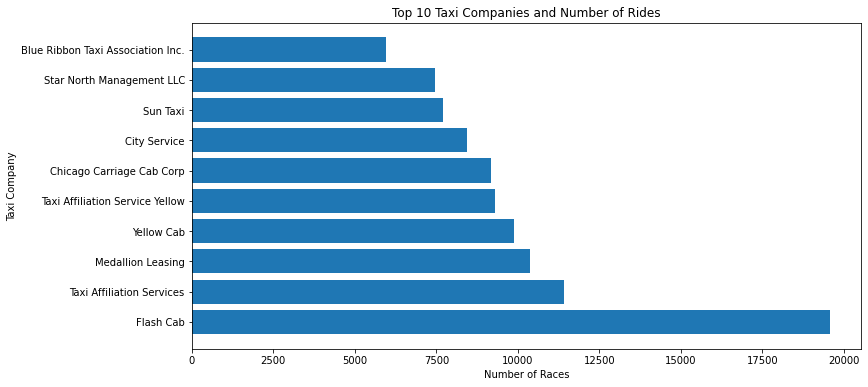

In [39]:
# Sort the DataFrame 'trips_amount' by the number of trips in descending order
sorted_trips = trips_amount.sort_values('trips_amount', ascending=False)

# Select the top 10 companies
top_10_companies = sorted_trips.head(10)

# Create horizontal bar chart with top 10 companies
plt.figure(figsize=(12, 6))
plt.barh(top_10_companies['company_name'], top_10_companies['trips_amount'])
plt.xlabel('Number of Races')
plt.ylabel('Taxi Company')
plt.title('Top 10 Taxi Companies and Number of Rides')
plt.show()

Based on the data provided on the number of trips by each taxi company, we can carry out analyzes and conclude on the results. Let's analyze the two charts separately:

**Graph of Taxi Companies and Number of Rides:**
By looking at the bar graph of taxi companies and the number of rides, we can identify the top companies based on the amount of trips taken. Some of the companies that stand out are "Flash Cab", "Taxi Affiliation Services" and "Medallion Leasing" which have a significantly higher number of rides compared to other companies.

These data suggest that these companies may have a larger market share or be more popular with passengers during the analyzed period. It is important to note that the company "Flash Cab" leads with a significant number of trips, which may indicate its strong presence and popularity among users.

**Chart of the Top 10 Neighborhoods by Number of Races:**

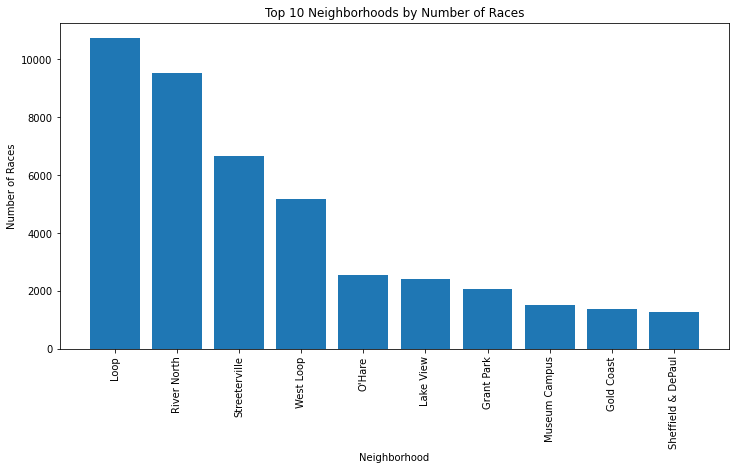

In [40]:
# Creating the bar chart for the top 10 neighborhoods and number of rides
plt.figure(figsize=(12, 6))
plt.bar(top_10_neighborhoods['dropoff_location_name'], top_10_neighborhoods['average_trips'])
plt.xlabel('Neighborhood')
plt.ylabel('Number of Races')
plt.title('Top 10 Neighborhoods by Number of Races')
plt.xticks(rotation=90)
plt.show()

**Chart of the Top 10 Neighborhoods by Number of Races:**
Analyzing the bar graph of the top 10 neighborhoods in terms of the number of rides as a destination, we can see that the "Loop" neighborhood is the leader with a significantly higher amount of rides. Next, we have "River North" and "Streeterville" as the second and third top destination neighborhoods, respectively.

These results indicate that these neighborhoods are popular destinations for cab rides in Chicago during the analyzed period. It is possible that these neighborhoods have a high passenger demand or are important commercial and tourist areas in the city.

**Intermediate conclusion:**
Based on the graphs and data analyzed, we can conclude that there are taxi companies that stand out in terms of number of trips, such as "Flash Cab", and popular neighborhoods as destinations, such as "Loop". This information can be useful for the Zuber company when making strategic decisions, such as allocating resources or planning partnerships with the most popular taxi companies, aiming to better meet the demand in popular neighborhoods.

## Testing hypotheses (Python)

### Weather condition dataframe

Our last SQL query before this project in the Jupyter Notebook allowed us to access the Dataframe `duration_seconds`, it contains data about trips from the Loop to O'Hare International Airport, showing the date and time of the start of the race, weather conditions at the time the race started and the duration of the trip in seconds.

### Hypothesis

When observing the collected data and its variables, we considered the following hypothesis for analysis:


**"The average length of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."**

### t-test

In [41]:
# Filtering data only for rainy Saturdays
saturday_rainy = duration_seconds[duration_seconds['weather_conditions'] == 'Bad']

# Filtering the data only for Saturdays with good weather conditions
saturday_good = duration_seconds[duration_seconds['weather_conditions'] == 'Good']

# Performing the hypothesis test
result = stats.ttest_ind(saturday_rainy['duration_seconds'], saturday_good['duration_seconds'], equal_var=False)

# Printing the p-value
print("Value of p-value:", result.pvalue)

# Testing the hypothesis
alpha = 0.01
if result.pvalue < alpha:
     print("The average length of rides from the Loop to O'Hare International Airport is significantly different on rainy Saturdays.")
else:
     print("There is insufficient evidence to conclude that the average duration of rides from the Loop to O'Hare International Airport is significantly different on rainy Saturdays.")

Value of p-value: 9.126383933880083e-08
The average length of rides from the Loop to O'Hare International Airport is significantly different on rainy Saturdays.


### Intermediate conclusions (for t-test)

To test the hypothesis that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays, we were able to formulate the following null and alternative hypotheses:

**Null hypothesis (H0)**: The average duration of rides from the Loop to O'Hare International Airport is the same on rainy Saturdays and on fair weather Saturdays.

**Alternative Hypothesis (H1)**: The average duration of rides from the Loop to O'Hare International Airport is significantly different on rainy Saturdays compared to Saturdays with good weather conditions.

To test this hypothesis, we used a statistical hypothesis test, specifically the *independent Student's t-test*.

This test compares the means of two independent samples (in this case, the duration of trips on rainy Saturdays and on good weather Saturdays) to determine whether there is a significant difference between them.

The **criterion used** to test the hypothesis is the **p-value**. The p-value is the probability of obtaining an equal or more extreme difference between the means of the two samples, assuming the null hypothesis is true. If the p-value is less than a predetermined significance level (usually 0.05), we reject the null hypothesis in favor of the alternative hypothesis.

In the provided code, we perform the independent Student's t-test using the ttest_ind function of the **scipy.stats module**. We then compare the p-value with a significance level (alpha) of 0.01 and, based on this comparison, issue a conclusion indicating whether or not there is a significant difference in the mean duration of walks on rainy Saturdays.

Even when adjusting the significance level to a more rigorous value, 0.01, the result was maintained, indicating that the difference observed in the average duration of trips is **statistically significant**.

Therefore, we can confidently state that weather conditions, specifically rainy Saturdays, have an impact on the average length of trips from the Loop to O'Hare International Airport. This can be useful for planning and forecasting travel time in adverse weather conditions, in order to provide a better experience for passengers.

## Conclusion

We arrived at some conclusions of the main topics of the project, highlighting the actions taken, the results obtained and possible suggestions for the Zuber company:

**Exploratory data analysis:**

We've identified the top destination neighborhoods and the most popular taxi companies based on the number of trips.
This can help Zuber understand passenger preferences and identify areas of greatest demand.

**Impact of weather conditions:**

We observed that weather conditions, especially rainy Saturdays, have a significant impact on average trip duration.
This can be used to improve travel time planning and forecasting in adverse weather conditions to provide a better passenger experience.

**Suggestions to optimize the Zuber service:**

Based on analysis of the most popular taxi companies, Zuber may consider strategic partnerships with these companies to better serve demand in popular areas.
The analysis of the main destination neighborhoods can direct the allocation of resources and the offer of additional services in places of greater demand.
The company can exploit other variables, such as distance traveled and peak hours, to improve operational efficiency and provide a more efficient service.

**Continuous monitoring:**

It is important to conduct regular reviews to monitor trends and changes in passenger preferences and market conditions.
Continuous data collection and regular analysis can provide up-to-date insights and support strategic decision-making.

**Future considerations:**

It is recommended that Zuber continue to collect additional data, such as passenger feedback and information about local events, to enrich the analysis and gain a more complete understanding of demand patterns.
The company can exploit advanced data analysis techniques, such as machine learning, to forecast future demand and optimize resource allocation.


**In summary**, analyzing the data provided Zuber with valuable insights into passenger preferences, the impact of weather conditions and demand trends in different areas of Chicago. Based on these results, Zuber can make strategic decisions to improve its service, better meet passenger needs and stand out in the ride-sharing market. It is recommended that the airline continue to regularly monitor and analyze data to adapt to changes in passenger preferences and the ever-evolving market environment.